# Diabetic Retinopathy Prediction Using Different ML models

# Importing Packages

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score

In [2]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\pronostico_dataset.csv",sep=';')

In [3]:
data.head(30)

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
5,5,52.181782,121.080264,110.488129,115.468279,retinopathy
6,6,68.722144,115.232290,92.730813,106.784960,retinopathy
7,7,58.716578,98.653683,94.172130,100.829654,retinopathy
8,8,59.121758,102.681371,96.991612,106.331045,retinopathy
9,9,63.624683,96.341053,80.919213,121.558605,retinopathy


# EDA & Visualizations

In [4]:
data[data.duplicated()]

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis


In [5]:
data.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [7]:
data.dtypes

ID                int64
age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis        object
dtype: object

In [8]:
data.isnull().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [9]:
data=data.drop('ID',axis=1)

In [10]:
data

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [11]:
data = data.replace({'prognosis': {'retinopathy': 1, 
                                'no_retinopathy': 0}})

In [12]:
data

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1


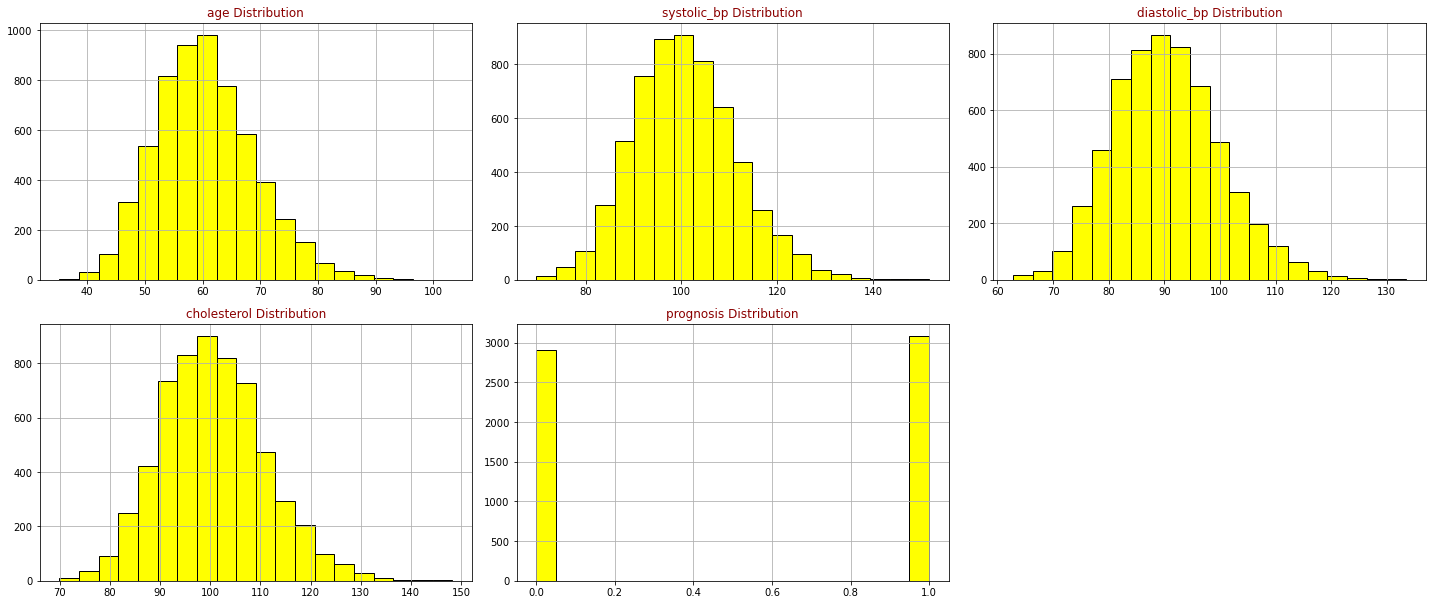

In [13]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,25))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='Yellow',edgecolor="black")
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,6,3)

In [14]:
data.prognosis.value_counts()

1    3087
0    2913
Name: prognosis, dtype: int64

<AxesSubplot:xlabel='prognosis', ylabel='count'>

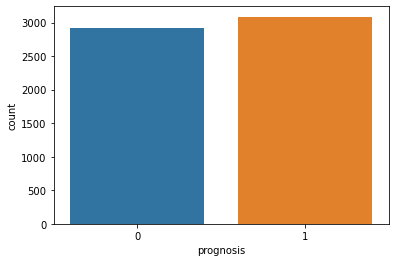

In [15]:
sns.countplot(x='prognosis',data=data)

In [16]:
data.corr()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
age,1.000000,0.010361,-0.005410,-0.006972,0.377440
systolic_bp,0.010361,1.000000,0.405406,0.406029,0.339842
diastolic_bp,-0.005410,0.405406,1.000000,0.398345,0.181541
cholesterol,-0.006972,0.406029,0.398345,1.000000,0.315811
prognosis,0.377440,0.339842,0.181541,0.315811,1.000000


In [240]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
age,1.000000,0.010361,-0.005410,-0.006972,0.377440
systolic_bp,0.010361,1.000000,0.405406,0.406029,0.339842
diastolic_bp,-0.005410,0.405406,1.000000,0.398345,0.181541
cholesterol,-0.006972,0.406029,0.398345,1.000000,0.315811
prognosis,0.377440,0.339842,0.181541,0.315811,1.000000


In [18]:
skew_val = data.skew().sort_values(ascending=False)
skew_val

age             0.441141
cholesterol     0.361514
diastolic_bp    0.336555
systolic_bp     0.334655
prognosis      -0.058039
dtype: float64

In [19]:
kurtosis_val = data.kurtosis().sort_values(ascending=False)
kurtosis_val

age             0.275005
cholesterol     0.259594
systolic_bp     0.212703
diastolic_bp    0.162188
prognosis      -1.997297
dtype: float64

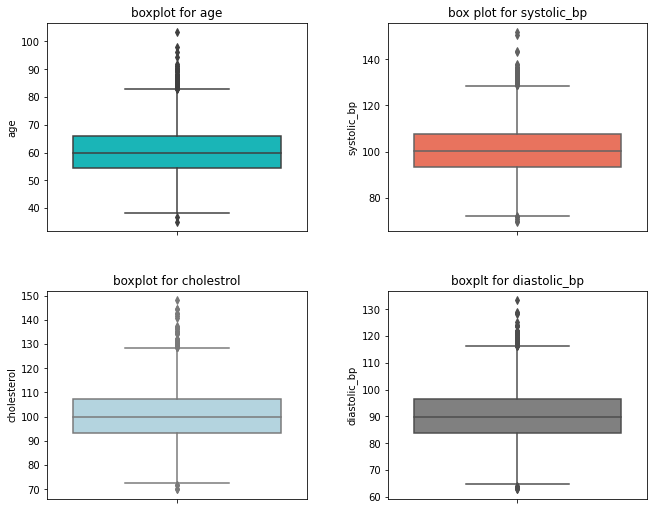

In [20]:
continous_list = ['age', 'systolic_bp', 'diastolic_bp','cholesterol']
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.boxplot(y = data['age'],color='darkturquoise')
plt.title('boxplot for age')

plt.subplot(2,2,2)
sns.boxplot(y = data['systolic_bp'],color='tomato')
plt.title('box plot for systolic_bp')

plt.subplot(2,2,3)
sns.boxplot(y = data['cholesterol'],color = 'lightblue')
plt.title('boxplot for cholestrol')

plt.subplot(2,2,4)
sns.boxplot(y = data['diastolic_bp'],color = 'grey')
plt.title('boxplt for diastolic_bp')

plt.tight_layout(pad = 4)
plt.show()

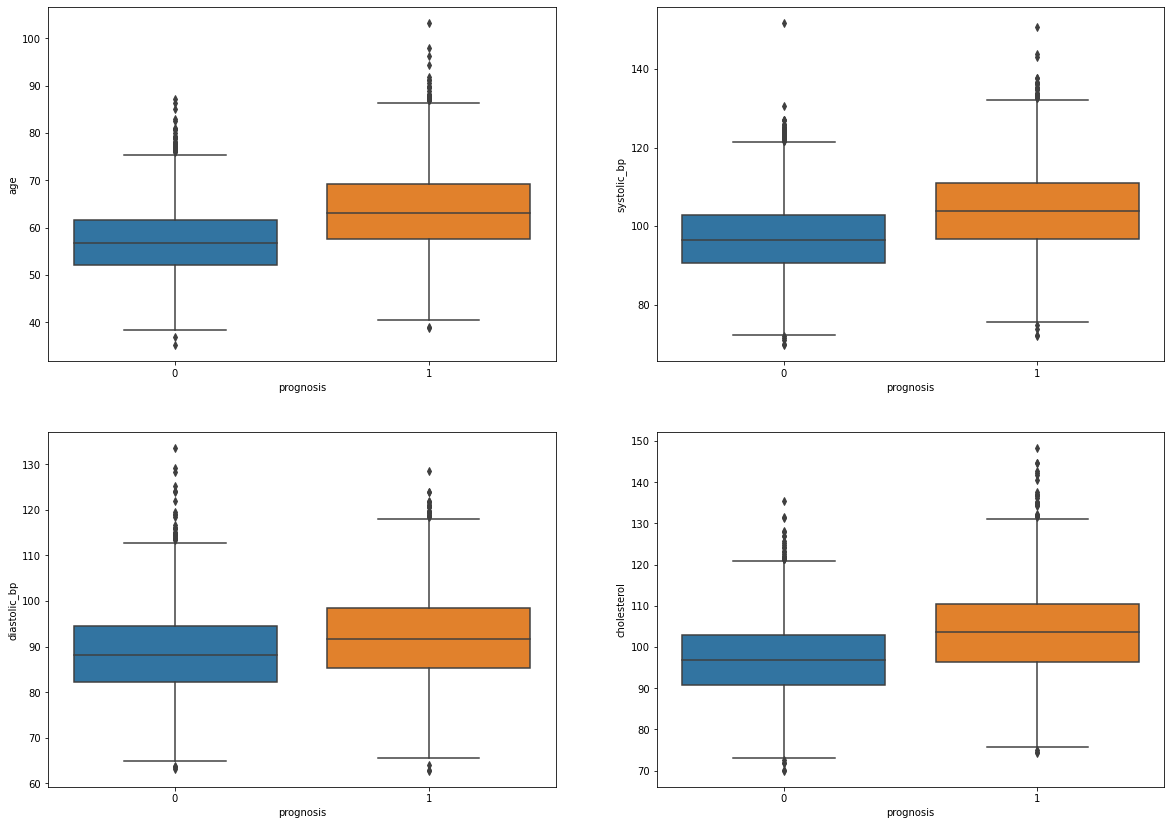

In [21]:
index = 0
plt.figure(figsize=(20,30))
for feature in data.iloc[:,0:4]:
    if feature != "prognosis":
        index += 1
        plt.subplot(4, 2, index)
        sns.boxplot(x='prognosis', y=feature, data=data)

E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

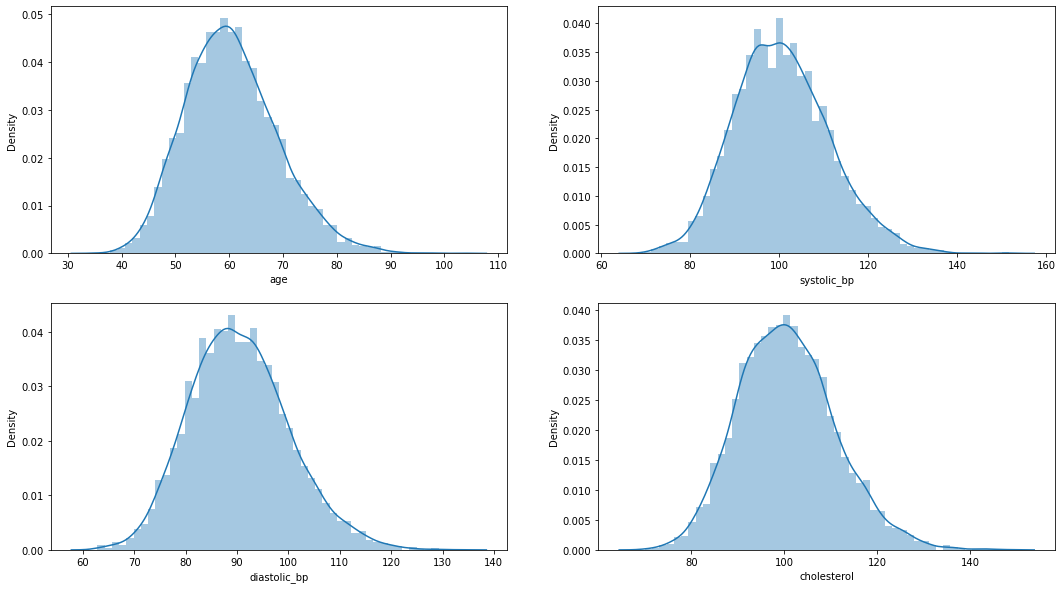

In [22]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.distplot(data['age'])
plt.subplot(2,2,2)
sns.distplot(data['systolic_bp'])
plt.subplot(2,2,3)
sns.distplot(data['diastolic_bp'])
plt.subplot(2,2,4)
sns.distplot(data['cholesterol'])
plt.show()

In [23]:
target_1=data[data['prognosis']==1]
target_0=data[data['prognosis']==0]

In [24]:
fig=plt.figure(figsize=(12,7))

<Figure size 864x504 with 0 Axes>

E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution of a normal patient')

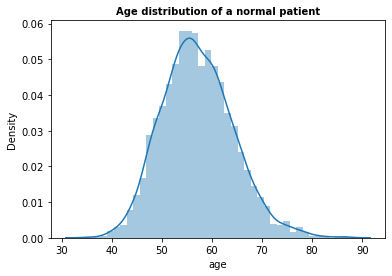

In [25]:
sns.distplot(target_0['age'])
plt.title("Age distribution of a normal patient",fontsize=10, weight='bold') 

E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution of a diabetic retinopathy patient')

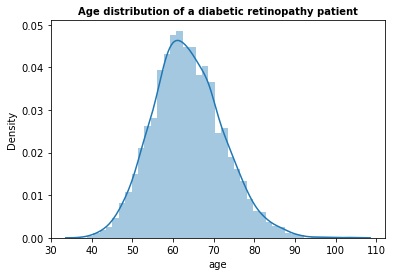

In [26]:
sns.distplot(target_1['age'])
plt.title("Age distribution of a diabetic retinopathy patient",fontsize=10, weight='bold') 

In [27]:
class expl_analysis:
    def __init__(self,data):
        self.dt=data
        
        
    def scatplot(self,X_new,Y_new):
        plt.figure(figsize=(16,9))
        sns.scatterplot(x=X_new,y=Y_new,
                        hue='prognosis',data=data)

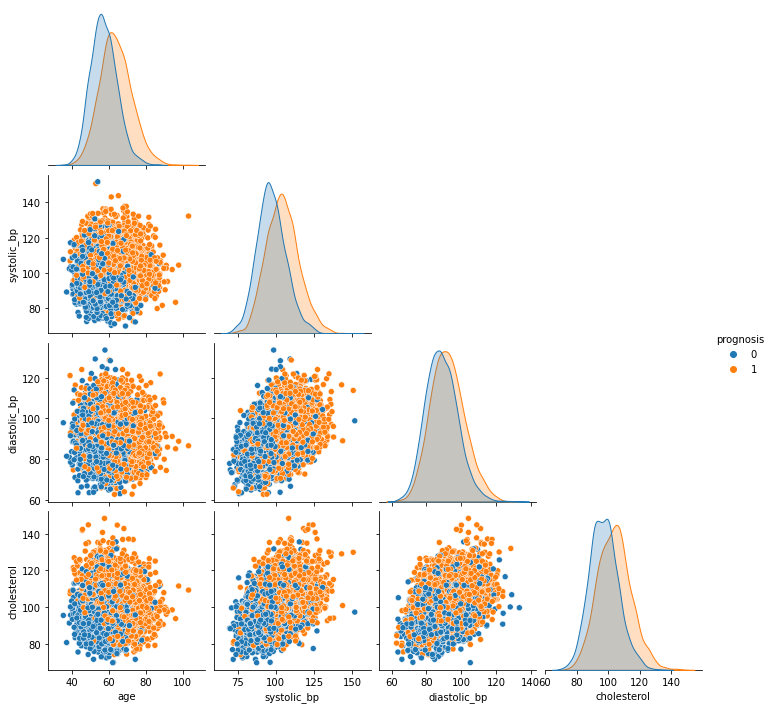

In [28]:
sns.pairplot(data, hue="prognosis", corner=True);

In [29]:
plot_data=expl_analysis(data)

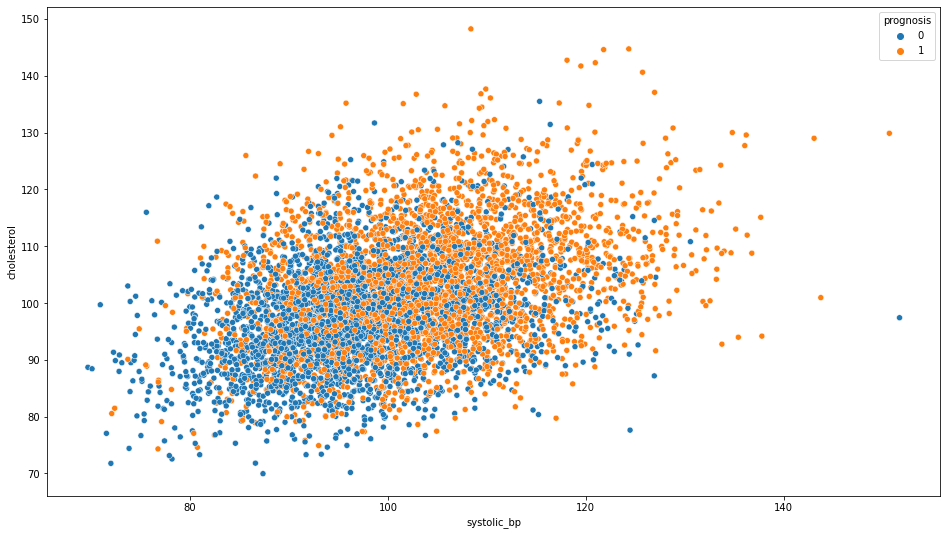

In [30]:
X_new='systolic_bp'
Y_new='cholesterol'
plot_data.scatplot(X_new,Y_new)

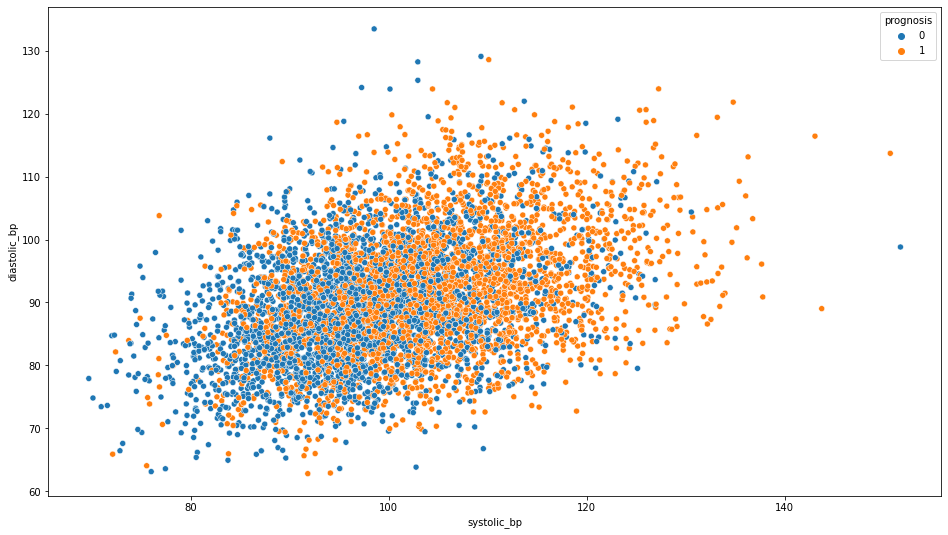

In [31]:
X_new='systolic_bp'
Y_new='diastolic_bp'
plot_data.scatplot(X_new,Y_new)

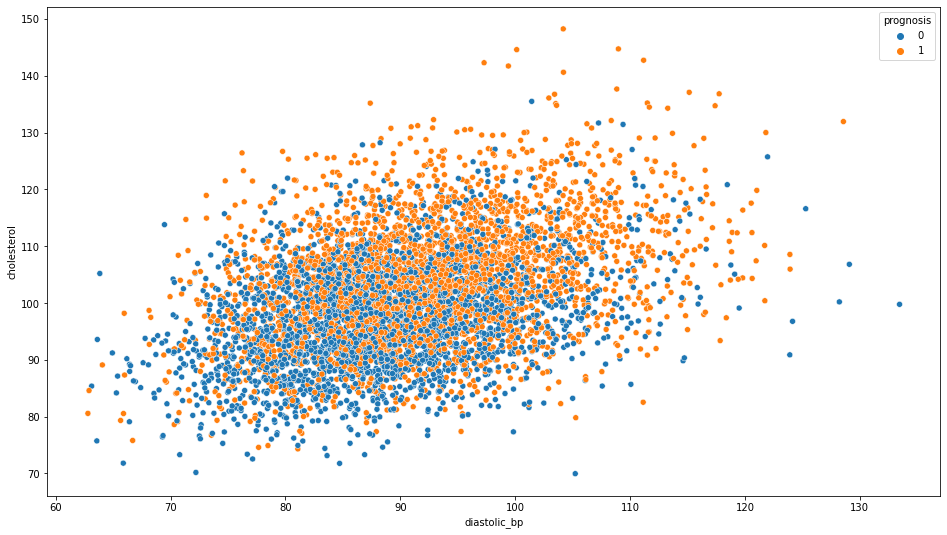

In [32]:
X_new='diastolic_bp'
Y_new='cholesterol'
plot_data.scatplot(X_new,Y_new)

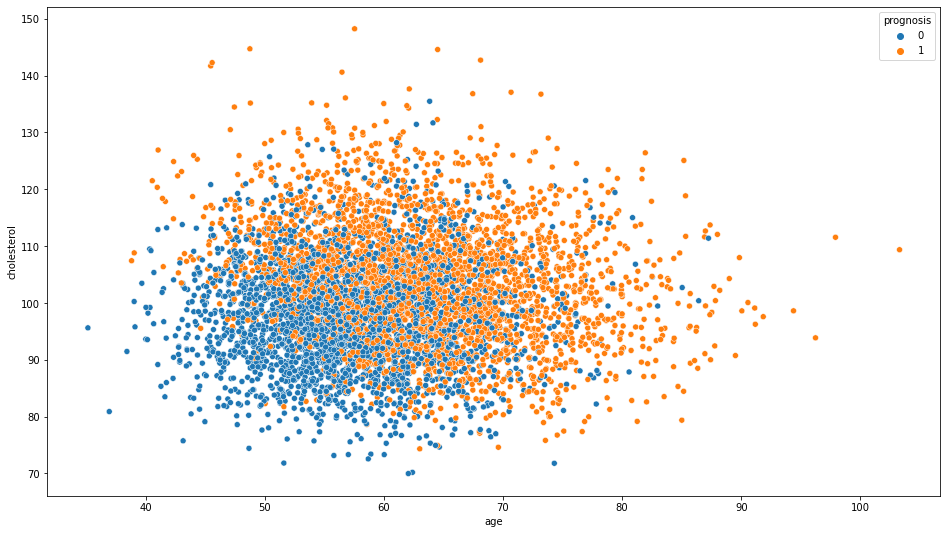

In [33]:
X_new='age'
Y_new='cholesterol'
plot_data.scatplot(X_new,Y_new)

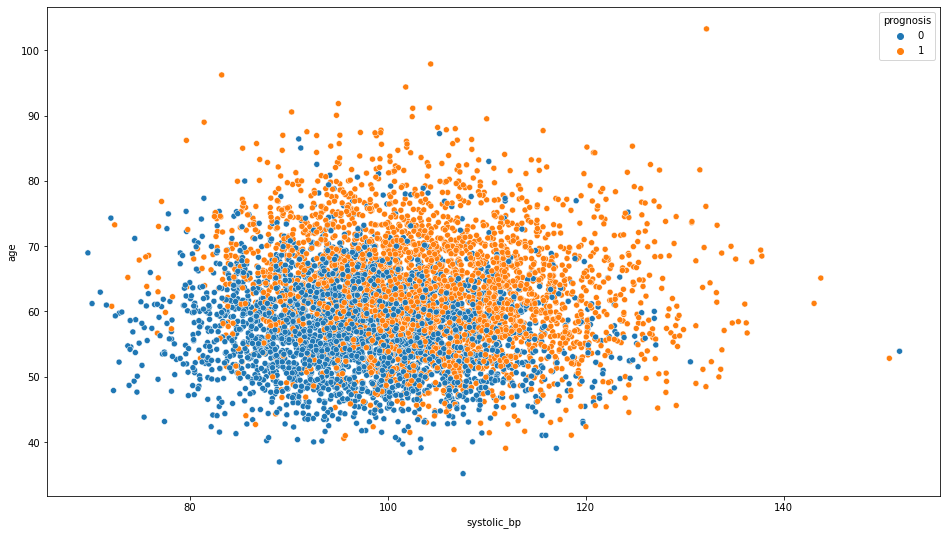

In [34]:
X_new='systolic_bp'
Y_new='age'
plot_data.scatplot(X_new,Y_new)

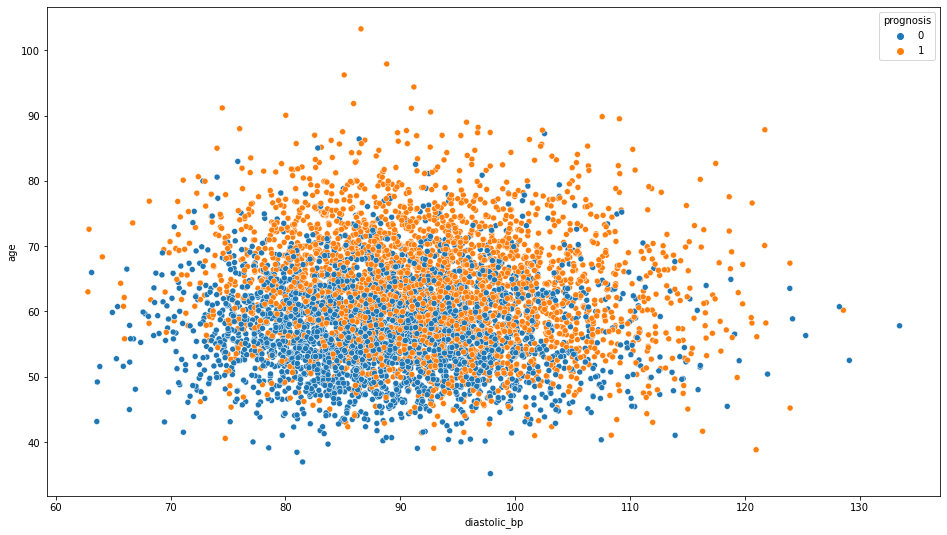

In [35]:
X_new='diastolic_bp'
Y_new='age'
plot_data.scatplot(X_new,Y_new)

# Creating models

In [197]:
X = data.drop('prognosis',axis=1)
y = data["prognosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

In [198]:
X_test1=X_test

In [199]:
X

,age,systolic_bp,diastolic_bp,cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770
...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986
5996,63.099686,100.039527,93.515186,104.971404
5997,55.562243,98.421446,102.697875,120.875951
5998,63.468956,106.809289,88.060631,106.052213


In [200]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 6000, dtype: int64

In [201]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({0: 2009, 1: 2191})

# Implementation of Scaling

In [202]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling Logistic Regression (LR) with Default Parameters

In [41]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[667 237]
 [206 690]]


Accuracy of Logistic Regression: 75.3888888888889 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       904
           1       0.74      0.77      0.76       896

    accuracy                           0.75      1800
   macro avg       0.75      0.75      0.75      1800
weighted avg       0.75      0.75      0.75      1800



# Cross-Validating Logistic Regression (LR) Model

In [42]:
log_xvalid_model = LogisticRegression()
log_xvalid_model_scores = cross_validate(log_xvalid_model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                          'f1'], cv = 10)
log_xvalid_model_scores = pd.DataFrame(log_xvalid_model_scores, index = range(1, 11))
log_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.000000,0.008002,0.716667,0.723214,0.739726,0.731377
2,0.008000,0.016000,0.733333,0.748837,0.735160,0.741935
3,0.008000,0.000000,0.783333,0.810680,0.762557,0.785882
4,0.008007,0.007991,0.747619,0.762791,0.748858,0.755760
5,0.000000,0.000000,0.738095,0.744395,0.757991,0.751131
6,0.000000,0.007990,0.761905,0.776744,0.762557,0.769585
7,0.008001,0.000000,0.726190,0.742991,0.726027,0.734411
8,0.008001,0.000000,0.733333,0.746544,0.739726,0.743119
9,0.007998,0.000000,0.761905,0.764444,0.785388,0.774775
10,0.008001,0.016000,0.726190,0.758621,0.700000,0.728132


In [43]:
log_xvalid_model_scores.mean()[2:]

test_accuracy     0.742857
test_precision    0.757926
test_recall       0.745799
test_f1           0.751611
dtype: float64

#  Modelling Logistic Regression (LR) with Best Parameters Using GridSeachCV

In [44]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = (0, 0.01, 0.1, 1, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [45]:
LR_grid_model = LogisticRegression(solver='saga', max_iter=5000, class_weight = "balanced")

LR_grid_model = GridSearchCV(LR_grid_model, param_grid = param_grid)

In [46]:
LR_grid_model.fit(X_train, y_train)

E:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\softwares\Anaconda\lib\site-packages\sklearn\linear_

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, solver='saga'),
             param_grid={'C': (0, 0.01, 0.1, 1, 10, 20),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [47]:
print(LR_grid_model.best_params_)
print(LR_grid_model.best_estimator_)

{'C': 0.01, 'l1_ratio': 0.05263157894736842, 'penalty': 'elasticnet'}
LogisticRegression(C=0.01, class_weight='balanced',
                   l1_ratio=0.05263157894736842, max_iter=5000,
                   penalty='elasticnet', solver='saga')


In [48]:
y_pred = LR_grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")


[[680 224]
 [228 668]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       904
           1       0.75      0.75      0.75       896

    accuracy                           0.75      1800
   macro avg       0.75      0.75      0.75      1800
weighted avg       0.75      0.75      0.75      1800

--------------------------------------------------------


In [49]:
pd.crosstab(y_test, y_pred)

col_0,0,1
prognosis,,
0,680,224
1,228,668


# The Implementation of Naive Bayes

In [50]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[688 216]
 [239 657]]


Accuracy of Naive Bayes model: 74.72222222222223 

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       904
           1       0.75      0.73      0.74       896

    accuracy                           0.75      1800
   macro avg       0.75      0.75      0.75      1800
weighted avg       0.75      0.75      0.75      1800



In [51]:
pd.crosstab(y_test,nbpred)

col_0,0,1
prognosis,,
0,688,216
1,239,657


# The Implementation of Random Forest Classifier

In [100]:
rf = RandomForestClassifier(n_estimators=150, random_state=42,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[630 274]
 [182 714]]


Accuracy of Random Forest: 74.66666666666667 

              precision    recall  f1-score   support

           0       0.78      0.70      0.73       904
           1       0.72      0.80      0.76       896

    accuracy                           0.75      1800
   macro avg       0.75      0.75      0.75      1800
weighted avg       0.75      0.75      0.75      1800



# Cross-Validating Random Forest Classifier Model

In [105]:
rf_xvalid_model = RandomForestClassifier(max_depth=5)

rf_xvalid_model_scores = cross_validate(rf_xvalid_model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
rf_xvalid_model_scores = pd.DataFrame(rf_xvalid_model_scores, index = range(1, 11))

rf_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.416872,0.015621,0.707143,0.705128,0.753425,0.728477
2,0.390530,0.015622,0.740476,0.745536,0.762557,0.753950
3,0.393256,0.031242,0.785714,0.784141,0.812785,0.798206
4,0.383827,0.015622,0.750000,0.745690,0.789954,0.767184
5,0.390495,0.015623,0.714286,0.716157,0.748858,0.732143
6,0.415348,0.015621,0.750000,0.745690,0.789954,0.767184
7,0.399248,0.015623,0.733333,0.729614,0.776256,0.752212
8,0.406193,0.015619,0.726190,0.730088,0.753425,0.741573
9,0.401787,0.031208,0.750000,0.728000,0.831050,0.776119
10,0.543770,0.024001,0.740476,0.763033,0.731818,0.747100


In [106]:
rf_xvalid_model_scores.mean()[2:]

test_accuracy     0.739762
test_precision    0.739308
test_recall       0.775008
test_f1           0.756415
dtype: float64

# Modelling Random Forest Classifier with Best Parameters Using GridSeachCV

In [103]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [104]:
RF_grid_model = RandomForestClassifier()

RF_grid_model = GridSearchCV(estimator=RF_grid_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(X_train, y_train) 

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [53]:
pd.crosstab(y_test,rf_predicted)

col_0,0,1
prognosis,,
0,630,274
1,182,714


# Modelling XGBoost Classifier (XGB) with Default Parameters

In [54]:
xgb = XGBClassifier(learning_rate=0.001, n_estimators=60, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[628 276]
 [197 699]]


Accuracy of Extreme Gradient Boost: 73.72222222222223 

              precision    recall  f1-score   support

           0       0.76      0.69      0.73       904
           1       0.72      0.78      0.75       896

    accuracy                           0.74      1800
   macro avg       0.74      0.74      0.74      1800
weighted avg       0.74      0.74      0.74      1800



In [55]:
pd.crosstab(y_test,xgb_predicted)

col_0,0,1
prognosis,,
0,628,276
1,197,699


# Modelling KNeighbours Classifier (KNN) with Default Parameters

In [56]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[666 238]
 [203 693]]


Accuracy of K-NeighborsClassifier: 75.5 

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       904
           1       0.74      0.77      0.76       896

    accuracy                           0.76      1800
   macro avg       0.76      0.76      0.75      1800
weighted avg       0.76      0.76      0.75      1800



# Cross-Validating KNeighbors (KNN) Model

In [107]:
knn_xvalid_model = KNeighborsClassifier(n_neighbors=30)

knn_xvalid_model_scores = cross_validate(knn_xvalid_model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
knn_xvalid_model_scores = pd.DataFrame(knn_xvalid_model_scores, index = range(1, 11))

knn_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.007997,0.032032,0.714286,0.718062,0.744292,0.730942
2,0.008000,0.031969,0.714286,0.723982,0.730594,0.727273
3,0.000000,0.023998,0.776190,0.785388,0.785388,0.785388
4,0.000000,0.023670,0.742857,0.755760,0.748858,0.752294
5,0.000000,0.031244,0.728571,0.731278,0.757991,0.744395
6,0.000000,0.015620,0.752381,0.755556,0.776256,0.765766
7,0.015657,0.015623,0.721429,0.725664,0.748858,0.737079
8,0.000000,0.031242,0.738095,0.755869,0.735160,0.745370
9,0.000000,0.031243,0.766667,0.761905,0.803653,0.782222
10,0.000000,0.015584,0.750000,0.777778,0.731818,0.754098


In [108]:
knn_xvalid_model_scores.mean()[2:]

test_accuracy     0.740476
test_precision    0.749124
test_recall       0.756287
test_f1           0.752483
dtype: float64

# Modelling KNeighbors (KNN) with Best Parameters Using GridSeachCV

In [109]:
k_values= range(1, 50)
param_grid = {"n_neighbors": k_values, "p": [1, 2], "weights": ['uniform', "distance"]}

In [110]:
KNN_grid = KNeighborsClassifier()

In [111]:
KNN_grid_model = GridSearchCV(KNN_grid, param_grid, cv=10, scoring='accuracy')

In [119]:
KNN_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [120]:
print(KNN_grid_model.best_params_)
print("--------------------------------------------------------------------------------------------------------------------")
print(KNN_grid_model.best_estimator_)

{'n_neighbors': 44, 'p': 1, 'weights': 'distance'}
--------------------------------------------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=44, p=1, weights='distance')


In [121]:
KNN_model = KNeighborsClassifier(n_neighbors=44, p=1, weights='distance')
KNN_model.fit(X_train, y_train)
pred = KNN_model.predict(X_test)
y_train_pred = KNN_model.predict(X_train)

knn26_f1 = f1_score(y_test, y_pred)
knn26_acc = accuracy_score(y_test, y_pred)
knn26_recall = recall_score(y_test, y_pred)
knn26_auc = roc_auc_score(y_test, y_pred)

print('WITH K=26')
print('-------------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

WITH K=26
-------------------
[[381 523]
 [113 783]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.42      0.55       904
           1       0.60      0.87      0.71       896

    accuracy                           0.65      1800
   macro avg       0.69      0.65      0.63      1800
weighted avg       0.69      0.65      0.63      1800

--------------------------------------------------------


In [57]:
pd.crosstab(y_test,knn_predicted)

col_0,0,1
prognosis,,
0,666,238
1,203,693


In [122]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 5)
dt.fit(X_train, y_train)
dt.get_n_leaves()
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[622 282]
 [191 705]]


Accuracy of DecisionTreeClassifier: 73.72222222222223 

              precision    recall  f1-score   support

           0       0.77      0.69      0.72       904
           1       0.71      0.79      0.75       896

    accuracy                           0.74      1800
   macro avg       0.74      0.74      0.74      1800
weighted avg       0.74      0.74      0.74      1800



In [124]:
dt_xvalid_model = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 5)

dt_xvalid_model_scores = cross_validate(dt_xvalid_model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
dt_xvalid_model_scores = pd.DataFrame(dt_xvalid_model_scores, index = range(1, 11))

dt_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.024035,0.007998,0.723810,0.713693,0.785388,0.747826
2,0.016001,0.007967,0.747619,0.740426,0.794521,0.766520
3,0.032009,0.008084,0.740476,0.789474,0.684932,0.733496
4,0.015938,0.000000,0.723810,0.721030,0.767123,0.743363
5,0.000000,0.015661,0.714286,0.710638,0.762557,0.735683
6,0.015619,0.000000,0.761905,0.769231,0.776256,0.772727
7,0.015749,0.000000,0.723810,0.694340,0.840183,0.760331
8,0.016030,0.000000,0.692857,0.727273,0.657534,0.690647
9,0.000000,0.015674,0.754762,0.752174,0.789954,0.770601
10,0.015601,0.000000,0.738095,0.761905,0.727273,0.744186


In [125]:
dt_xvalid_model_scores.mean()[2:]

test_accuracy     0.732143
test_precision    0.738018
test_recall       0.758572
test_f1           0.746538
dtype: float64

In [126]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [127]:
DT_grid_model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)

DT_grid_model = GridSearchCV(estimator=DT_grid_model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


In [128]:
print(DT_grid_model.best_params_)
print("--------------------------------------------------------------------------------------------------------------------")
print(DT_grid_model.best_estimator_)

{'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
--------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=3,
                       min_samples_leaf=2, random_state=42, splitter='random')


In [129]:
DT_grid_model.fit(X_train, y_train)
y_pred = DT_grid_model.predict(X_test)

y_train_pred = DT_grid_model.predict(X_train)

dt_grid_f1 = f1_score(y_test, y_pred)
dt_grid_acc = accuracy_score(y_test, y_pred)
dt_grid_recall = recall_score(y_test, y_pred)
dt_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[[381 523]
 [113 783]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.42      0.55       904
           1       0.60      0.87      0.71       896

    accuracy                           0.65      1800
   macro avg       0.69      0.65      0.63      1800
weighted avg       0.69      0.65      0.63      1800

--------------------------------------------------------


In [59]:
pd.crosstab(y_test,dt_predicted)

col_0,0,1
prognosis,,
0,622,282
1,191,705


In [232]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[642 262]
 [176 720]]


Accuracy of Support Vector Classifier: 75.66666666666667 

              precision    recall  f1-score   support

           0       0.78      0.71      0.75       904
           1       0.73      0.80      0.77       896

    accuracy                           0.76      1800
   macro avg       0.76      0.76      0.76      1800
weighted avg       0.76      0.76      0.76      1800



In [233]:
svm_xvalid_model = SVC()

svm_xvalid_model_scores = cross_validate(svm_xvalid_model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
svm_xvalid_model_scores = pd.DataFrame(svm_xvalid_model_scores, index = range(1, 11))

svm_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.541526,0.109342,0.716667,0.713675,0.762557,0.737307
2,0.582377,0.157251,0.738095,0.735931,0.776256,0.755556
3,0.564321,0.109382,0.795238,0.792952,0.821918,0.807175
4,0.532383,0.109341,0.754762,0.752174,0.789954,0.770601
5,0.515475,0.109348,0.726190,0.716667,0.785388,0.749455
6,0.562373,0.109345,0.761905,0.753191,0.808219,0.779736
7,0.546748,0.109379,0.719048,0.714894,0.767123,0.740088
8,0.515478,0.104878,0.740476,0.741228,0.771689,0.756152
9,0.546747,0.109387,0.764286,0.752101,0.817352,0.783370
10,0.531089,0.109347,0.728571,0.743119,0.736364,0.739726


In [234]:
svm_xvalid_model_scores.mean()[2:]

test_accuracy     0.744524
test_precision    0.741593
test_recall       0.783682
test_f1           0.761917
dtype: float64

In [235]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [236]:
SVM_grid_model = SVC(random_state=42)

SVM_grid_model = GridSearchCV(SVM_grid_model, param_grid, verbose=3, refit=True)

In [237]:
SVM_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.725 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.786 total time=   0.5s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.745 total time=   0.5s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.731 total time=   0.5s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.743 total time=   0.5s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.721 total time=   0.2s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.765 total time=   0.2s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.750 total time=   0.2s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.727 total time=   0.2s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.745 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.725 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [238]:
print(SVM_grid_model.best_params_)
print(SVM_grid_model.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1, random_state=42)


In [239]:
y_pred = SVM_grid_model.predict(X_test)
svc_grid_acc_score = accuracy_score(y_test, y_pred)
print(svc_grid_acc_score*100)
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

75.05555555555556
[[628 276]
 [173 723]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.69      0.74       904
           1       0.72      0.81      0.76       896

    accuracy                           0.75      1800
   macro avg       0.75      0.75      0.75      1800
weighted avg       0.75      0.75      0.75      1800

--------------------------------------------------------


In [67]:
pd.crosstab(y_test,y_pred)

col_0,0,1
prognosis,,
0,680,224
1,228,668


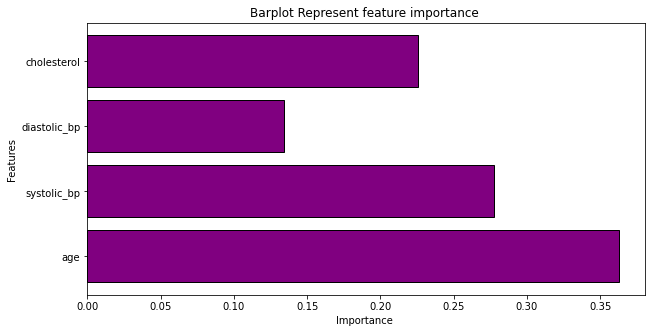

In [69]:
imp_feature = pd.DataFrame({'Feature': ['age', 'systolic_bp', 'diastolic_bp', 'cholesterol'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,5))
plt.title("Barplot Represent feature importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color='purple',edgecolor='black')
plt.show()

In [70]:
model_accuracy = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_accuracy

,Model,Accuracy
0,Logistic Regression,75.388889
1,Naive Bayes,74.722222
2,Random Forest,74.666667
3,Extreme Gradient Boost,73.722222
4,K-Nearest Neighbour,75.500000
5,Decision Tree,73.722222
6,Support Vector Machine,75.666667


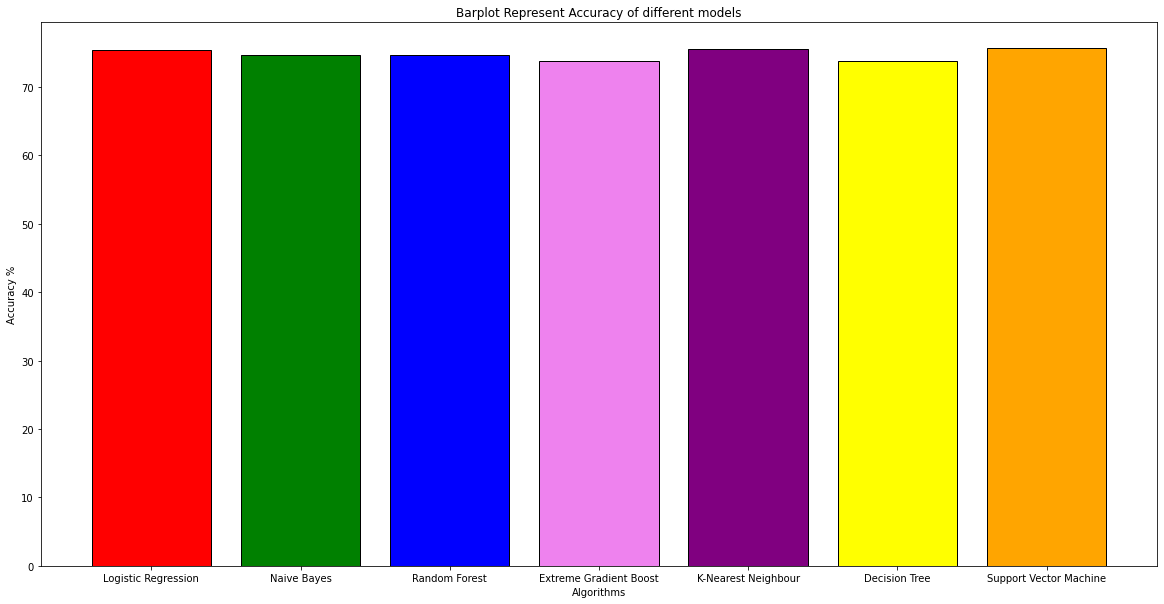

In [71]:
colors = ['red','green','blue','violet','purple','yellow','orange',]
plt.figure(figsize=(20,10))
plt.title("Barplot Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_accuracy['Model'],model_accuracy['Accuracy'],color = colors,edgecolor = 'Black')
plt.show()

In [72]:
scv=StackingCVClassifier(classifiers=[lr,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[627 277]
 [165 731]]


Accuracy of StackingCVClassifier: 75.44444444444444 

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       904
           1       0.73      0.82      0.77       896

    accuracy                           0.75      1800
   macro avg       0.76      0.75      0.75      1800
weighted avg       0.76      0.75      0.75      1800



In [73]:
pd.crosstab(y_test,scv_predicted)

col_0,0,1
prognosis,,
0,627,277
1,165,731


In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [75]:
array=data.values

In [76]:
X_new = array[:,0:4]
y_new = array[:,4]

In [77]:
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model_new = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = cross_val_score(model_new, X_new, y_new, cv=kfold)
print(results.mean()*100)

73.1


In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model_new = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model_new, X_new, y_new, cv=kfold)
print(results.mean()*100)

73.2


In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
num_trees = 10
kfold = KFold(n_splits=10)
model_new = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model_new, X_new, y_new, cv=kfold)
print(results.mean()*100)

72.66666666666669


In [82]:
from sklearn.ensemble import VotingClassifier

In [83]:
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = KNeighborsClassifier(n_neighbors=30)
estimators.append(('knn', model2))
model3 = SVC(kernel='rbf', C=2)
estimators.append(('svm', model3))

ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_new, y_new, cv=kfold)
print(results.mean()*100)

74.6


In [230]:
test_data = pd.concat([X_test1,y_test], axis=1)
test_data["Predictions"] = svc_predicted

test_data.sample(50)

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,Predictions
2455,55.481320,110.649137,100.323352,101.653885,1,1
2249,55.917946,96.337370,87.628844,101.599007,1,0
3554,54.899140,100.270854,85.871160,105.293038,1,0
3414,74.450450,90.419792,92.152326,84.649135,1,1
4018,57.868353,93.567535,94.520779,105.117139,0,0
3776,70.763854,98.352849,87.428448,117.550178,1,1
1586,57.025261,92.083239,91.229532,98.262871,0,0
5558,55.282916,99.346814,83.305182,101.064614,1,0
2141,64.717724,116.637756,97.451494,92.351796,1,1
2858,51.738258,106.443738,97.614043,102.052326,0,0
